# U.S. Medical Insurance Costs

Import the libraries needed for the success of our code.

In [1]:
#Medical Insurance Costs project
#Made by Luis Zúñiga Araya

#Import libraries needed


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error 


us_insurance_df = pd.read_csv(r"C:\Users\Luis\Downloads\python-portfolio-project-US-medical\python-portfolio-project-starter-files\insurance.csv")

Import our **Class** created for making filters on the Dataframe.

In [2]:
from DataFilter import DataFilter
    
DataR = DataFilter(us_insurance_df)

Successfully imported


Show the first 5 rows of the data set to see what the variables are and their content.

In [3]:
#First we plot the fisrt 5 rows to see wich variables we have
print(us_insurance_df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


Look for the type of the variables we have, this is important to know if data agress with the variable type showed.

In [4]:
#Look for the type of the variables we have
print(us_insurance_df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


Call the info method of the `DataFilter` Class that show some usefull information.

In [5]:
DataR.info()

The ammount of patients at the study are 1338
Amount of male patients:  676
Amount of female patients:  662
Average age for males of the data is:  38.68491124260355
Average age for females of the data is:  39.740181268882175
Average BMI for males is 29.74862426035503
Average BMI for females is 31.597515105740182
On this data BMI on females tends to be higher than for males
The number of non-smoking patients is:  1064
The number of non-smoking patients is:  274
The number of patients per region is: 364 southeast, 325 southwest, 325 northwest, 324 northeast


In order to analyze the relationship between the data in a simpler way, we use the `get_dummies` method to separate our variables **sex**, **smoker**, and **region** into columns with boolean features.

In [6]:
#Use get_dummies to find the correlation matrix
corr = pd.get_dummies(us_insurance_df, columns = ['sex','smoker','region'])
corr.corr()
#The variables which have a higher correlation between them are 'charges' and 'smoker'

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.046371,-0.003750,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.057292,-0.787251,0.787251,0.006349,-0.039905,0.073982,-0.043210
sex_female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184
sex_male,-0.020856,0.046371,0.017163,0.057292,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184
smoker_no,0.025019,-0.003750,-0.007673,-0.787251,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945
smoker_yes,-0.025019,0.003750,0.007673,0.787251,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945
region_northeast,0.002475,-0.138156,-0.022808,0.006349,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829


In the following two graphs, a certain variability in the data can be observed. When analyzing the correlation matrix, we realize that what is affecting these the most is **age**, since neither **sex** nor the **number of children** has a high correlation factor with insurance costs.

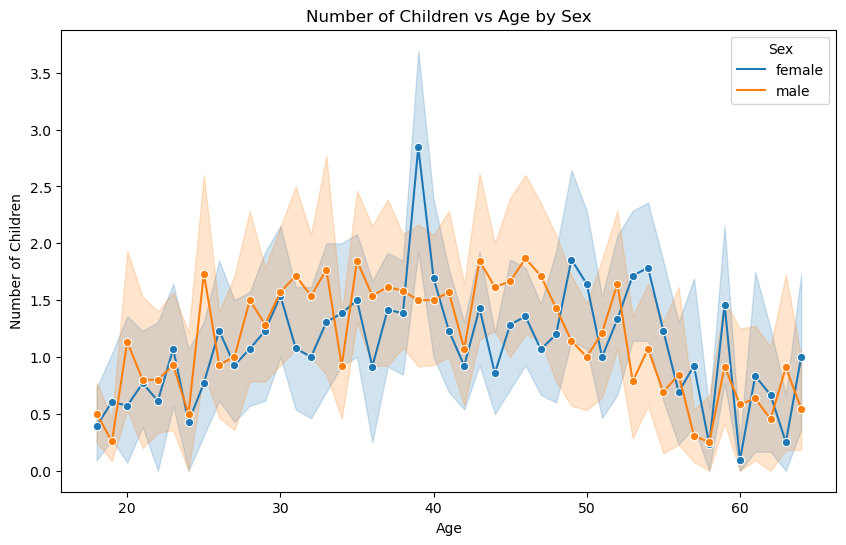

5


In [7]:
#Separate data per sex
plt.figure(figsize=(10, 6))
p = sns.lineplot(x="age", y="children", hue="sex", data=us_insurance_df, marker = 'o')
#Customize the chart
plt.title('Number of Children vs Age by Sex')
plt.xlabel('Age')
plt.ylabel('Number of Children')
plt.legend(title='Sex')
plt.show()
print(us_insurance_df['children'].max())

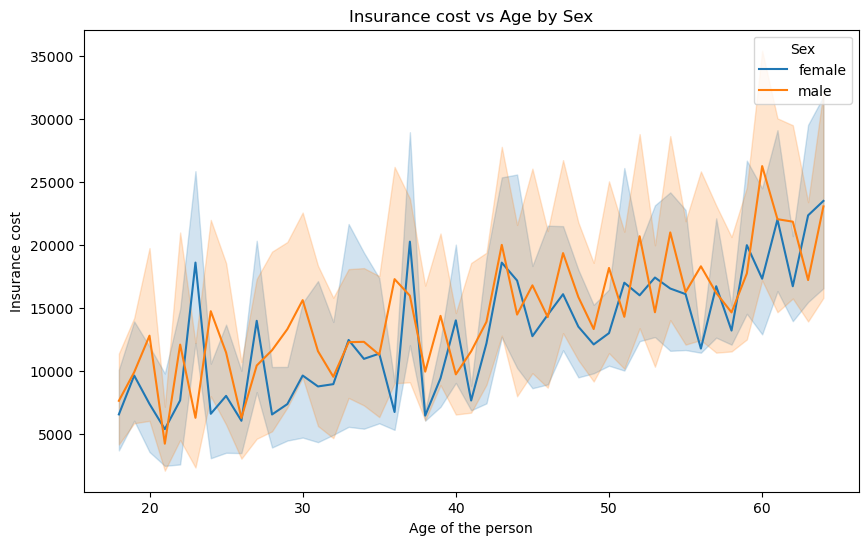

In [8]:
#Separate data per sex
plt.figure(figsize=(10, 6))
p = sns.lineplot(x="age", y="charges", hue="sex", data=us_insurance_df)
#Customize the chart
plt.title('Insurance cost vs Age by Sex')
plt.xlabel('Age of the person')
plt.ylabel('Insurance cost')
plt.legend(title='Sex')
plt.show()

In the following graph it can be observed that the changes in the **cost of insurance** by **region** and **sex** are not significant enough.

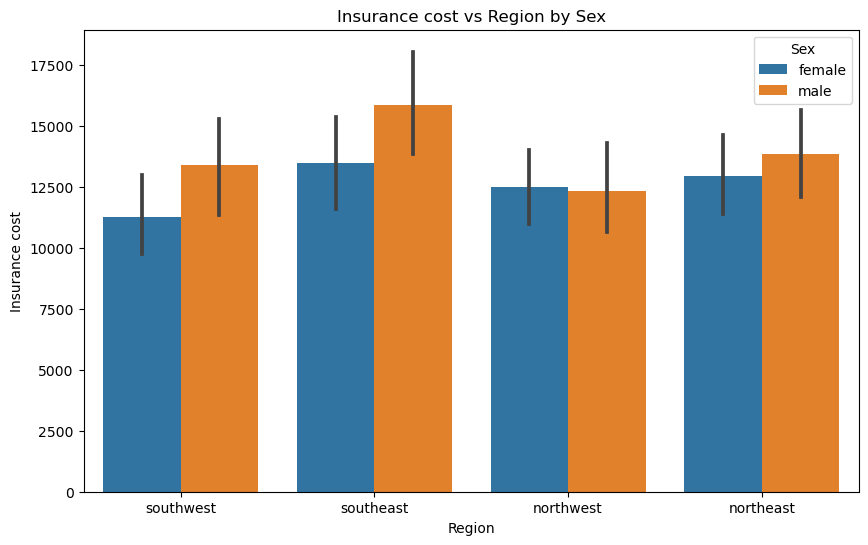

In [9]:
#Separate data per sex
plt.figure(figsize=(10, 6))
p = sns.barplot(x="region", y="charges", hue="sex", data=us_insurance_df)
#Customize the chart
plt.title('Insurance cost vs Region by Sex')
plt.xlabel('Region')
plt.ylabel('Insurance cost')
plt.legend(title='Sex')
plt.show()

As the correlation matrix showed, **BMI**, **sex** and **smoking** status do not seem to have any relationship with each other.

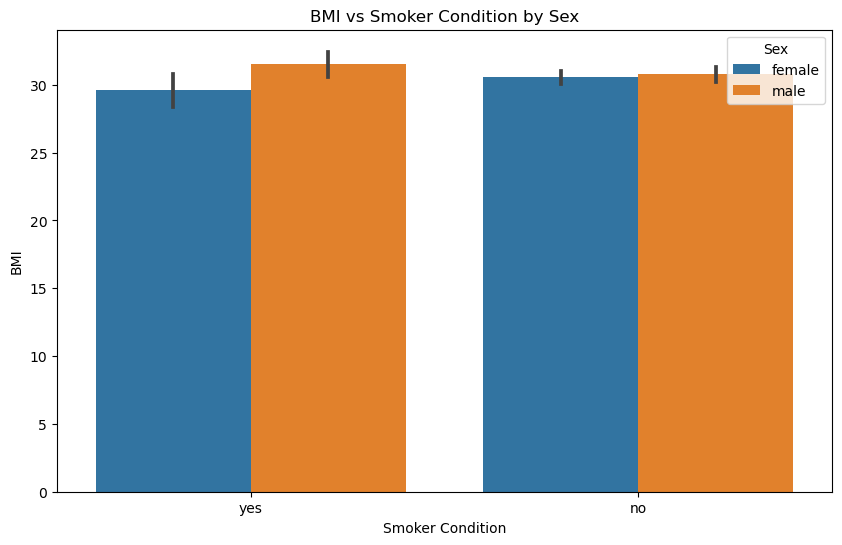

In [10]:
#Separate data per sex
plt.figure(figsize=(10, 6))
p = sns.barplot(x="smoker", y="bmi", hue="sex", data=us_insurance_df)
#Customize the chart
plt.title('BMI vs Smoker Condition by Sex')
plt.xlabel('Smoker Condition')
plt.ylabel('BMI')
plt.legend(title='Sex')
plt.show()

At the following bar plot, the behavior of the graphs tells that the **smoker condition** influences in **insurance cost** amount.

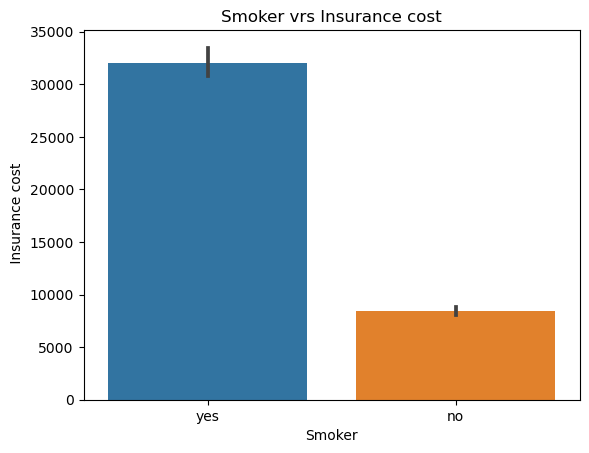

In [11]:
#To confirm the correlation on smoker and charges
p = sns.barplot(x="smoker", y="charges", data=us_insurance_df)
#Customize the chart
plt.title('Smoker vrs Insurance cost')
plt.xlabel('Smoker')
plt.ylabel(' Insurance cost')
plt.show()

Method from the `DataFilter` Class used for only showing patients with a specific age.

In [12]:
DataR.filter_age(40)

Data for patients with 40 years


,age,sex,bmi,children,smoker,region,charges
54,40,female,28.690,3,no,northwest,8059.67910
67,40,male,26.315,1,no,northwest,6389.37785
68,40,female,36.190,0,no,southeast,5920.10410
154,40,female,25.460,1,no,northeast,7077.18940
209,40,male,41.230,1,no,northeast,6610.10970
211,40,male,30.875,4,no,northwest,8162.71625
235,40,female,22.220,2,yes,southeast,19444.26580
243,40,male,35.300,3,no,southwest,7196.86700
266,40,male,19.800,1,yes,southeast,17179.52200
280,40,female,28.120,1,yes,northeast,22331.56680


Separate the dataframe into **features** and **output**.

In [13]:
#Separate the dataframe in features and output
X = corr.drop(columns = 'charges')
y = corr['charges']

Split data into **train** and **test** sets.

In [14]:
#Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) 


Create a `LinearRegression` model.

In [15]:
#Creating a regression model
model = LinearRegression() 
#Fit the model with training data
model.fit(X_train, y_train)

LinearRegression()

Make predictions on the test data set.

In [16]:
# making predictions 
y_pred = model.predict(X_test)

Evaluate the model to see how good it turned out to be.

In [17]:
# model evaluation 
print('Mean_squared_error : ', mean_squared_error(y_test, y_pred)) 
print('Mean_absolute_error : ', mean_absolute_error(y_test, y_pred)) 
print('Model score: ', model.score(X_test, y_test))

Mean_squared_error :  33683659.32465648
Mean_absolute_error :  3987.9628476976295
Model score:  0.760219696678277


With the correlation matrix we found out that **sex**, **number of children** and **regions** are features with not much weight on charges so we proceed to drop them to optimize our model.

In [18]:

new_X = corr.drop(columns=['sex_male','sex_female','children','region_northeast','region_northwest','region_southwest','region_southeast'])

We proceed to create our model and evaluate if it really improved.

In [19]:
#Split the data with the new dataframe
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.3, random_state=101) 
#Creating a regression model
model = LinearRegression() 
#Fit the new model with training data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# model evaluation 
print('Mean_squared_error : ', mean_squared_error(y_test, y_pred)) 
print('Mean_absolute_error : ', mean_absolute_error(y_test, y_pred)) 
print('Model score: ', model.score(X_test, y_test))

Mean_squared_error :  3.9074381438906897e-23
Mean_absolute_error :  4.864778563401092e-12
Model score:  1.0


With these simple methods we observed that our model became more rigid, having a score of **1** and extremely small **errors**.